# Init

In [1]:
import os

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find("project")
# slice the path from the index of 'project' to the end
project_path = path[: index_project + 7]
# set the working directory
os.chdir(project_path + "/src")
print(f"Project path set to: {os.getcwd()}")


Project path set to: c:\Github\new-peak-project\src


In [2]:
from dotenv import dotenv_values
config = dotenv_values(".env")
print(config["DATA_PATH"])

I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\new-peak-project\experiments


In [3]:
new_path = config["NEW_DATA_PATH"]
print(f'New data path set to: {new_path}')

New data path set to: I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project


# Config

In [4]:
from models.utils.config_manager import initialise_config

initialise_config(folder_name="model-inspection", verbose=1)


Folder I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection already exists. No changes made.


In [5]:
# or load existing config
from models.utils.config_manager import load_configs, print_config

loaded_config = load_configs(folder_name="model-inspection", config_suffix="E5R2")
print_config(loaded_config)

notebook: 
  version: E5R2
  name: model-inspection
  compatible_notebooks: ['model-inspection-1']
  desc: E5R2 - originated from test case E, with 5 cascades (pathways) and
2 regulations, fixed random seed 

exp: 
  spec: 
    n_layers: 2
    n_cascades: 5
    n_regs: 2
    gen_seed: 42
    drug: 
      name: D
      start: 500
      dose: 500
      regulations: []
      target_all: True
  parameter_generation: 
    ic_range: [200, 1000]
    param_range: [0.5, 1.5]
    param_mul_range: [0.99, 1.01]
  simulation: 
    start: 0
    stop: 1000
    step: 100


# Run

In [6]:
from models.Specs.ModelSpec3 import ModelSpec3

notebook_config = loaded_config["notebook"]
exp_config = loaded_config["exp"]
spec_config = exp_config['spec']
n_layers = spec_config['n_layers']
new_spec = ModelSpec3(num_intermediate_layers=n_layers)


In [7]:
import logging
from models.Specs.Drug import Drug
logging.basicConfig(level=logging.INFO)


drug_config = spec_config['drug']
drug_name = drug_config['name']
drug_start = drug_config['start']
drug_dose = drug_config['dose']
drug_regulations = drug_config['regulations']

n_cascades = spec_config["n_cascades"]
n_regs = spec_config["n_regs"]
seed = spec_config["gen_seed"]

new_drug = Drug(name=drug_name, start_time=drug_start, default_value=drug_dose)

# check if target_all exists in drug_config, if not set to False
drug_target_all = drug_config.get('target_all', False)

if drug_target_all:
    # If the drug targets all receptors, we don't need to add specific regulations
    for n in range(n_cascades):
        target = f'R{n+1}' # assuming receptors are named R1, R2, ..., Rn
        new_drug.add_regulation(target, 'down') # assuming the type is 'down' for all
else: 
    for regs in drug_regulations:
        target, type = regs[0], regs[1]
        new_drug.add_regulation(target, type)

new_spec.generate_specifications(n_cascades, n_regs, seed)
new_spec.add_drug(new_drug)

In [8]:
param_gen_config = exp_config['parameter_generation']
specie_range = param_gen_config['ic_range']
param_range = param_gen_config['param_range']
param_mul_range = param_gen_config['param_mul_range']
builder = new_spec.generate_network('test', specie_range, param_range, param_mul_range, seed)

INFO:models.Specs.ModelSpec3:Generated model test with 32 reactions.
INFO:models.Specs.ModelSpec3:Model States: 32
INFO:models.Specs.ModelSpec3:Model Parameters: 86
INFO:models.Specs.ModelSpec3:Model Reactions: 32


In [9]:
print(builder.get_antimony_model())

model test

J0: R1a -> R1; (J0_Vmax+D*J0_Kw0)*R1a/(J0_Km + R1a)
J1: R1 -> R1a; J1_Vmax*R1/(J1_Km + R1)
J2: R2a -> R2; (J2_Vmax+D*J2_Kw0)*R2a/(J2_Km + R2a)
J3: R2 -> R2a; J3_Vmax*R2/(J3_Km + R2)
J4: R3a -> R3; (J4_Vmax+D*J4_Kw0)*R3a/(J4_Km + R3a)
J5: R3 -> R3a; J5_Vmax*R3/(J5_Km + R3)
J6: R4a -> R4; (J6_Vmax+D*J6_Kw0)*R4a/(J6_Km + R4a)
J7: R4 -> R4a; J7_Vmax*R4/(J7_Km + R4)
J8: R5a -> R5; (J8_Vmax+D*J8_Kw0)*R5a/(J8_Km + R5a)
J9: R5 -> R5a; J9_Vmax*R5/(J9_Km + R5)
J10: I1_1a -> I1_1; J10_Vmax*I1_1a/(J10_Km + I1_1a)
J11: I1_1 -> I1_1a; (J11_Vmax+R1a*J11_Kw0)*I1_1/(J11_Km + I1_1)
J12: I1_2a -> I1_2; J12_Vmax*I1_2a/(J12_Km + I1_2a)
J13: I1_2 -> I1_2a; (J13_Vmax+R2a*J13_Kw0)*I1_2/(J13_Km + I1_2)
J14: I1_3a -> I1_3; (J14_Vmax+I1_2a*J14_Kw0)*I1_3a/(J14_Km + I1_3a)
J15: I1_3 -> I1_3a; (J15_Vmax+R3a*J15_Kw0)*I1_3/(J15_Km + I1_3)
J16: I1_4a -> I1_4; J16_Vmax*I1_4a/(J16_Km + I1_4a)
J17: I1_4 -> I1_4a; (J17_Vmax+R4a*J17_Kw0)*I1_4/(J17_Km + I1_4)
J18: I1_5a -> I1_5; J18_Vmax*I1_5a/(J18_Km + I1_5a)
J

In [10]:
from models.Solver.RoadrunnerSolver import RoadrunnerSolver
from models.utils.config_manager import save_data
sim_config = exp_config['simulation']
sim_start = sim_config['start']
sim_stop = sim_config['stop']
sim_step = sim_config['step']
solver = RoadrunnerSolver()
solver.compile(builder.get_sbml_model())
res = solver.simulate(sim_start, sim_stop, sim_step)

save_data(notebook_config, res, "simulation_data")

save_data(notebook_config, res, "simulation_data", "csv", verbose=1)

Data saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\data\E5R2_simulation_data.csv


Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\figures\E5R2_simulation_plot.png


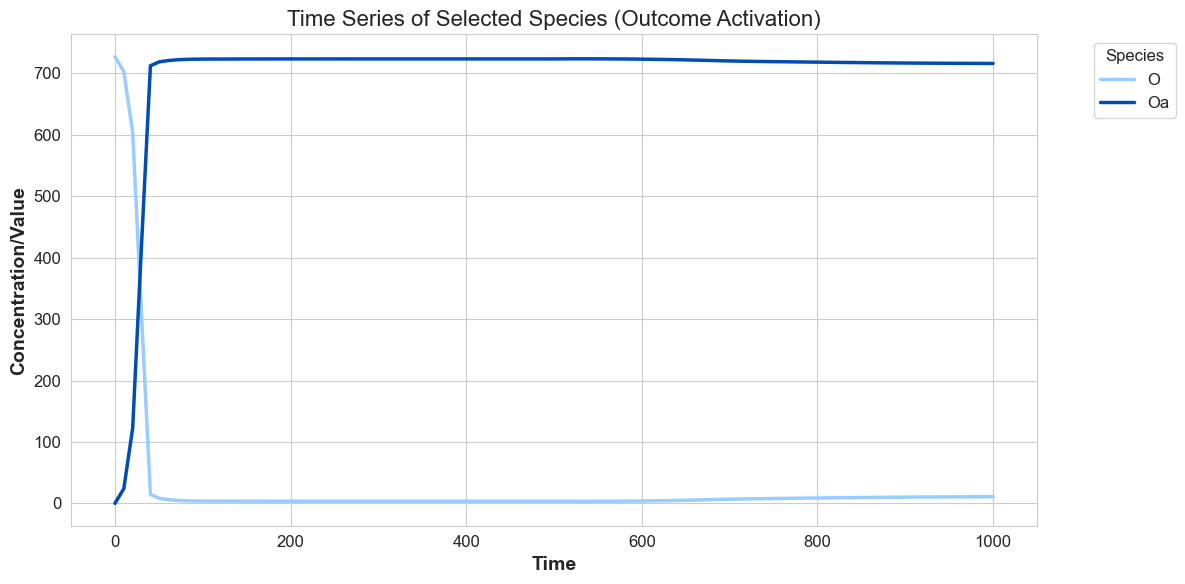

In [11]:
from visual.simulation import visualise_simulation
from models.utils.config_manager import save_figure

figure = visualise_simulation(res, activated_only=True, outcome_activation=True, show_legend=True)
save_figure(notebook_config, figure, "simulation_plot", "png", verbose=1, dpi=300)

Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\figures\E5R2_network_topology.png


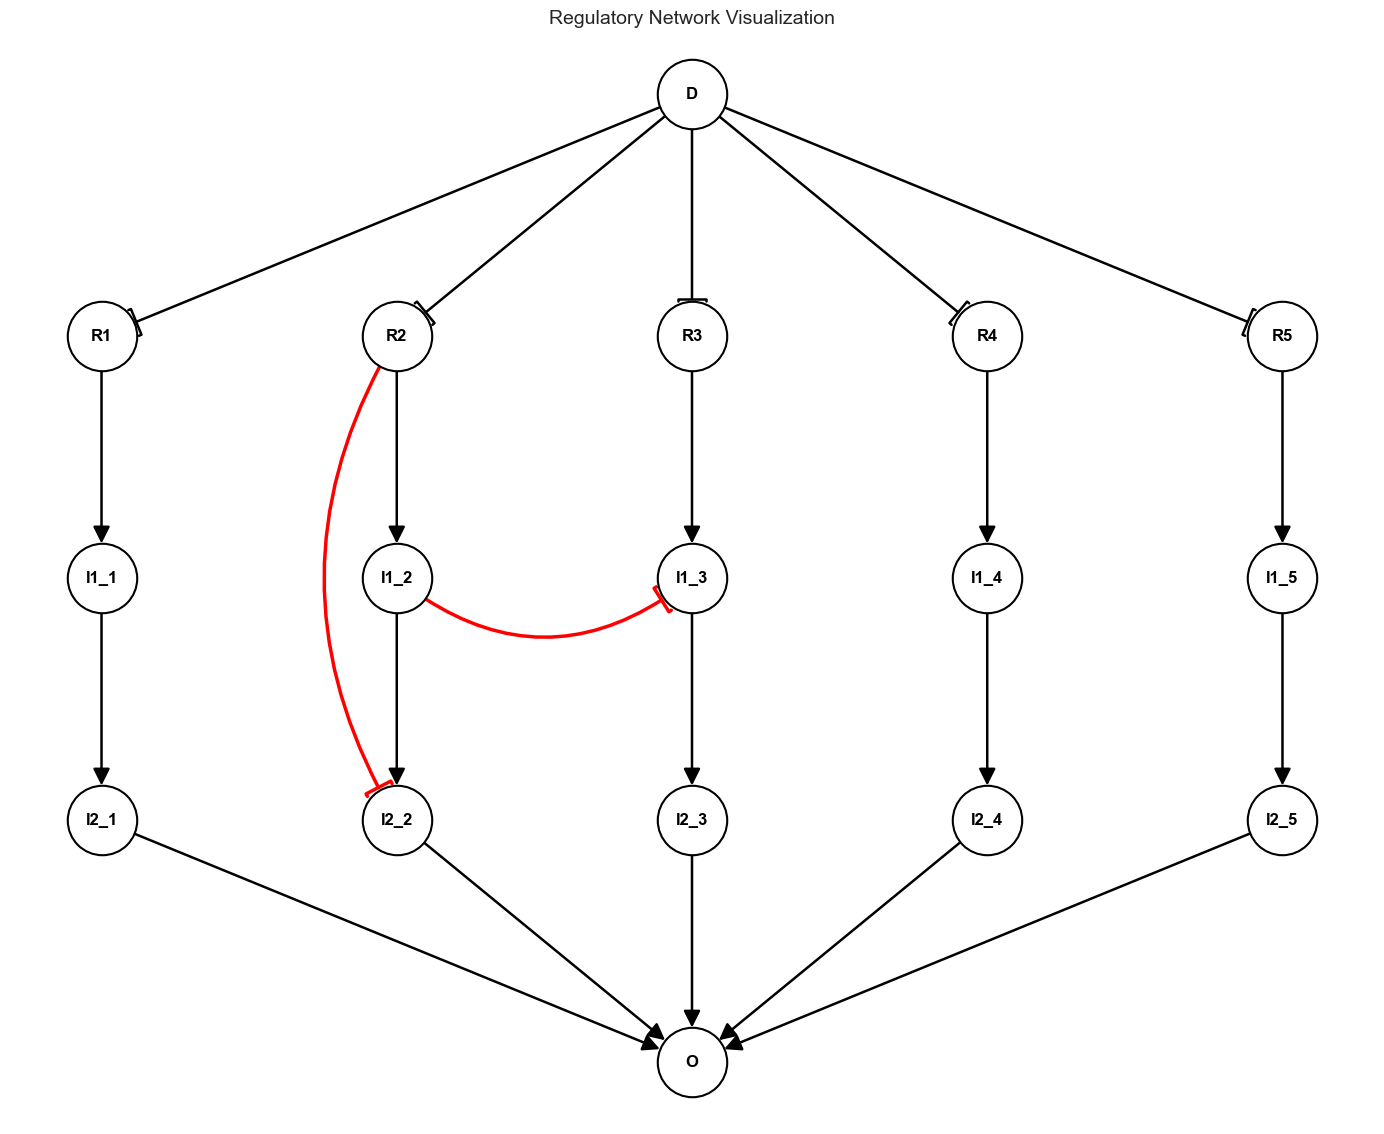

In [12]:
from visual.network_topology import visualise_network_2, create_layers

# num_intermediate_layers=2, num_cascades=3, drugs=['D']

layers = create_layers(n_layers, n_cascades, [drug_name])
regulations = new_spec.get_regulations()
feedback_regulations = new_spec.get_feedback_regulations()
figure = visualise_network_2(layers, regulations, feedback_regulations=feedback_regulations)
save_figure(notebook_config, figure, "network_topology", "png", verbose=1, dpi=300)

In [13]:
from SALib.sample import morris as morris_sample
from SALib.analyze import morris as morris_analyze
import numpy as np

# Define the problem for Morris method
species = builder.get_state_variables()  # assuming builder has a method to get species names
param_names = [s for s in species if s != 'Oa']  # exclude target output
# only include 'a' species
param_names = [s for s in param_names if s.endswith('a')]

# print(specie_range)  # [200, 1000]
# bounds need to be exactly specie_range but duplicated for each parameter
bounds = [specie_range for _ in param_names]

problem = {
    'num_vars': len(param_names),
    'names': param_names,
    'bounds': bounds
}

# Generate samples
param_values = morris_sample.sample(problem, N=100, num_levels=4, optimal_trajectories=None, seed=seed)

# Run model for each sample
def run_model(params):
    # Set species initial conditions
    solver.set_state_values(dict(zip(param_names, params)))
    sim = solver.simulate(sim_start, sim_stop, sim_step)
    # Extract Oa at final time point
    return sim['Oa'].iloc[-1]

Y = np.array([run_model(params) for params in param_values])

# Morris analysis
Si = morris_analyze.analyze(problem, param_values, Y, conf_level=0.95, print_to_console=True)


             mu   mu_star     sigma  mu_star_conf
R1a    0.508624  0.508624  0.310122      0.063381
R2a   -0.035789  0.035789  0.039855      0.007447
R3a    0.000436  0.000436  0.000468      0.000098
R4a    0.057863  0.057863  0.030158      0.006048
R5a    0.002724  0.002724  0.001578      0.000323
I1_1a  1.221140  1.221140  0.553382      0.109747
I1_2a  0.059162  0.059162  0.059096      0.011006
I1_3a  0.001389  0.001389  0.000932      0.000178
I1_4a  0.192312  0.192312  0.093473      0.017353
I1_5a  0.008266  0.008266  0.004078      0.000730
I2_1a  0.528943  0.528943  0.337062      0.060914
I2_2a  0.673412  0.673412  0.322278      0.063281
I2_3a  0.745782  0.745782  0.350097      0.060699
I2_4a  0.543253  0.543253  0.251826      0.050827
I2_5a  0.649379  0.649379  0.333704      0.063589


In [14]:
save_data(notebook_config, Si, "morris_analysis", "pkl", verbose=1)

Data saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\data\E5R2_morris_analysis.pkl


Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\figures\E5R2_morris_sensitivity_analysis.png


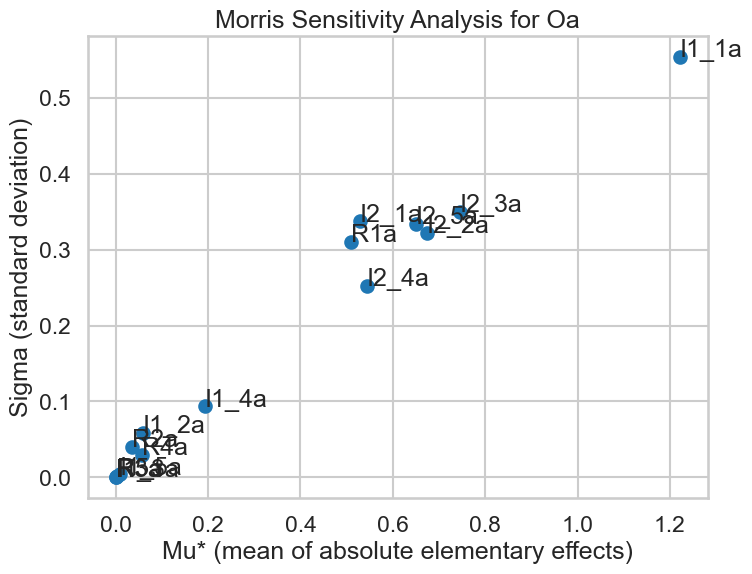

In [15]:

# Display results
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style('whitegrid')
# set font to arial 
plt.rcParams['font.family'] = 'Arial'



mu_star = Si['mu_star']
sigma = Si['sigma']

plt.figure(figsize=(8, 6))
plt.scatter(mu_star, sigma)
for i, name in enumerate(param_names):
    plt.text(mu_star[i], sigma[i], name)
plt.xlabel('Mu* (mean of absolute elementary effects)')
plt.ylabel('Sigma (standard deviation)')
plt.title('Morris Sensitivity Analysis for Oa')
plt.grid(True)

save_figure(notebook_config, plt.gcf(), "morris_sensitivity_analysis", "png", verbose=1, dpi=300)
plt.show()

In [16]:
from models.SyntheticGen import generate_feature_data_v3

initial_values = builder.get_state_variables()
# exclude all activated species from initial_values
initial_values = {k: v for k, v in initial_values.items() if not k.endswith('a')}
# exclude 'O' and 'Oa' from perturbation
initial_values = {k: v for k, v in initial_values.items() if k not in ['O', 'Oa']}

feature_data = generate_feature_data_v3(new_spec, initial_values, 'lhs', {'min': 200, 'max': 1000}, 500, seed)

In [17]:
from models.SyntheticGen import generate_target_data

sim_params = {
    'start': sim_start,
    'end': sim_stop,
    'points': sim_step
}

target_data, timecourse_data = generate_target_data(new_spec, solver, feature_data, sim_params, outcome_var='Oa', verbose=True)

Simulating perturbations: 100%|██████████| 500/500 [00:02<00:00, 219.68it/s]


Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\figures\E5R2_target_distribution.png


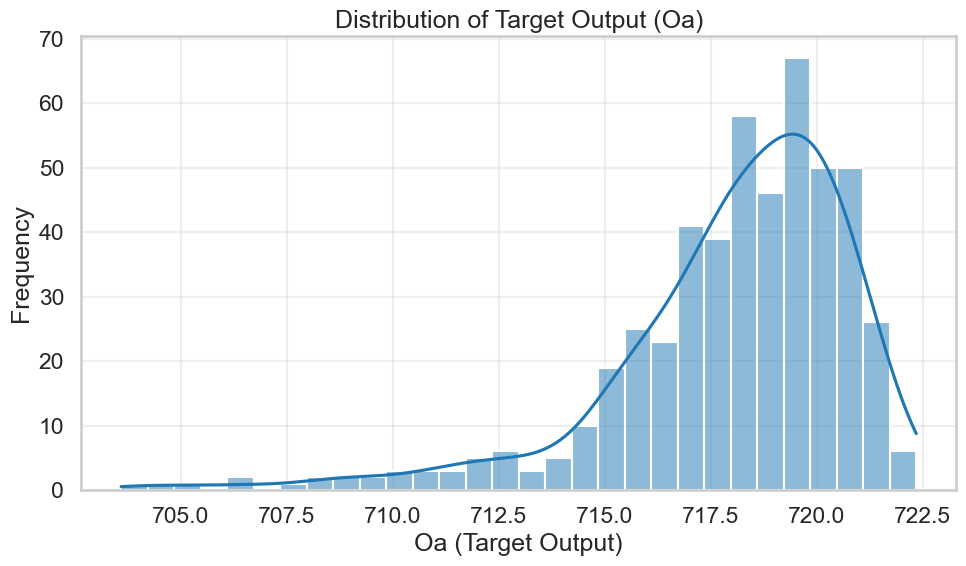

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(target_data['Oa'], bins=30, kde=True)
plt.xlabel('Oa (Target Output)')
plt.ylabel('Frequency')
plt.title('Distribution of Target Output (Oa)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

save_figure(notebook_config, plt.gcf(), "target_distribution", "png", verbose=1, dpi=300)
plt.show()

Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\figures\E5R2_target_timecourses.png


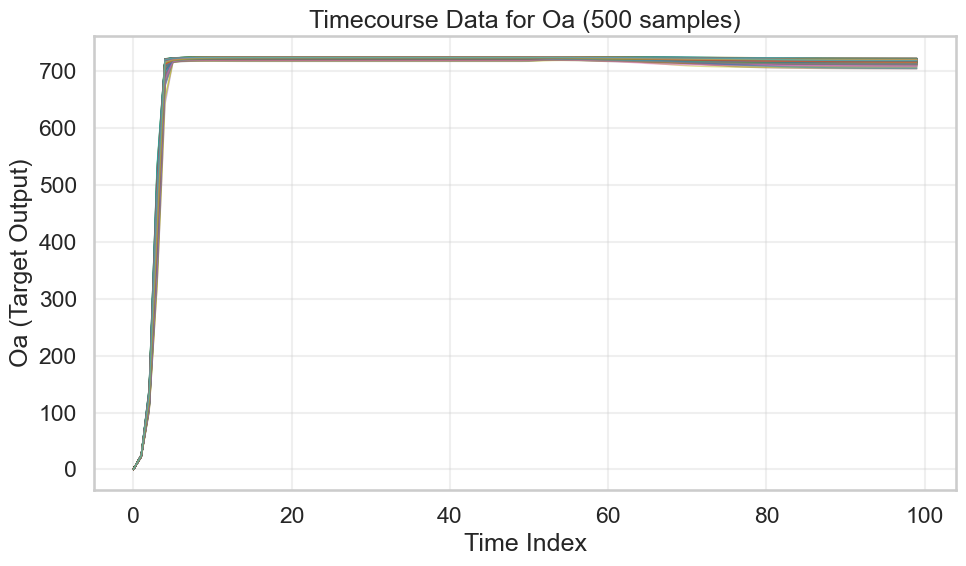

In [19]:
plt.figure(figsize=(10, 6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Arial'

for tc in timecourse_data:
    plt.plot(tc, alpha=0.5, linewidth=1)

plt.xlabel('Time Index')
plt.ylabel('Oa (Target Output)')
plt.title('Timecourse Data for Oa (500 samples)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

save_figure(notebook_config, plt.gcf(), "target_timecourses", "png", verbose=1, dpi=300)
plt.show()

Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\figures\E5R2_target_timecourses_after50.png


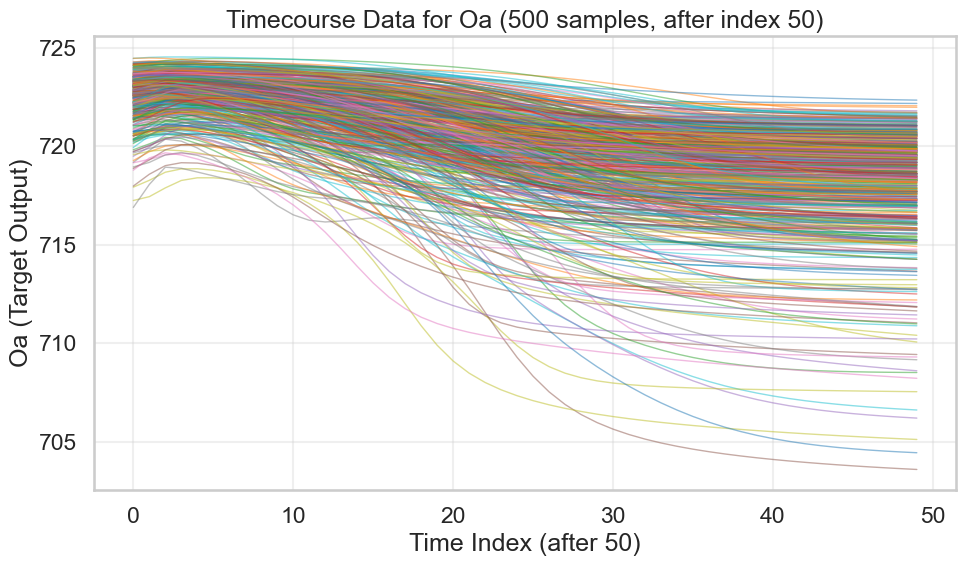

In [23]:
plt.figure(figsize=(10, 6))
sns.set_context('talk')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Arial'

for tc in timecourse_data:
    plt.plot(tc[50:], alpha=0.5, linewidth=1)

plt.xlabel('Time Index (after 50)')
plt.ylabel('Oa (Target Output)')
plt.title('Timecourse Data for Oa (500 samples, after index 50)')
plt.grid(True, alpha=0.3)
plt.tight_layout()

save_figure(notebook_config, plt.gcf(), "target_timecourses_after50", "png", verbose=1, dpi=300)
plt.show()

In [22]:
from tslearn.metrics import cdist_dtw
from tslearn.clustering import TimeSeriesKMeans
import numpy as np

# Convert timecourse_data to numpy array of shape (n_samples, n_timestamps)
X = np.stack(timecourse_data)

# Compute the pairwise DTW distance matrix
dtw_matrix = cdist_dtw(X)

# Perform KMeans clustering using DTW as the metric
n_clusters = 3  # You can change this as needed
kmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric="dtw", random_state=seed)
cluster_labels = kmeans.fit_predict(X)

c:\Github\new-peak-project\.venv\Lib\site-packages\tslearn\metrics\dtw_variants.py:1749: SyntaxWarning: invalid escape sequence '\d'
  """Compute the mask (region constraint).


KeyboardInterrupt: 

Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\figures\testCaseE3R_kmeans_clusters.png


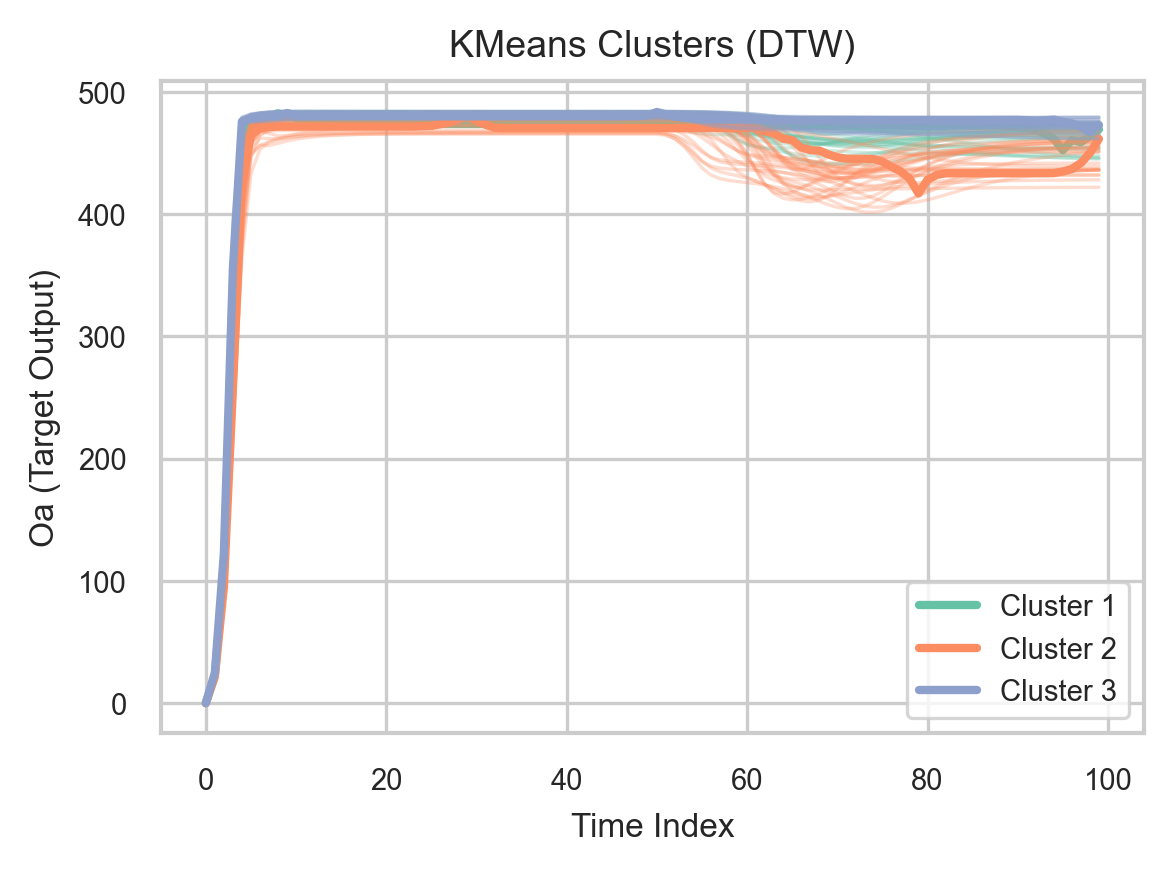

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('paper')
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Arial'

palette = sns.color_palette("Set2", n_clusters)

fig, ax = plt.subplots(figsize=(4, 3), dpi=300)

for cluster in range(n_clusters):
    idx = cluster_labels == cluster
    for tc in np.array(timecourse_data)[idx][:30]:
        ax.plot(tc, color=palette[cluster], alpha=0.3, linewidth=0.8)
    ax.plot(kmeans.cluster_centers_[cluster].ravel(), color=palette[cluster], linewidth=2, label=f'Cluster {cluster+1}')

ax.set_xlabel('Time Index', fontsize=8)
ax.set_ylabel('Oa (Target Output)', fontsize=8)
ax.set_title('KMeans Clusters (DTW)', fontsize=9)
ax.legend(fontsize=7, loc='best', frameon=True)
ax.tick_params(axis='both', labelsize=7)
plt.tight_layout()

save_figure(notebook_config, fig, "kmeans_clusters", "png", verbose=1, dpi=300)
plt.show()


Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\figures\testCaseE3R_kmeans_clusters_after50.png


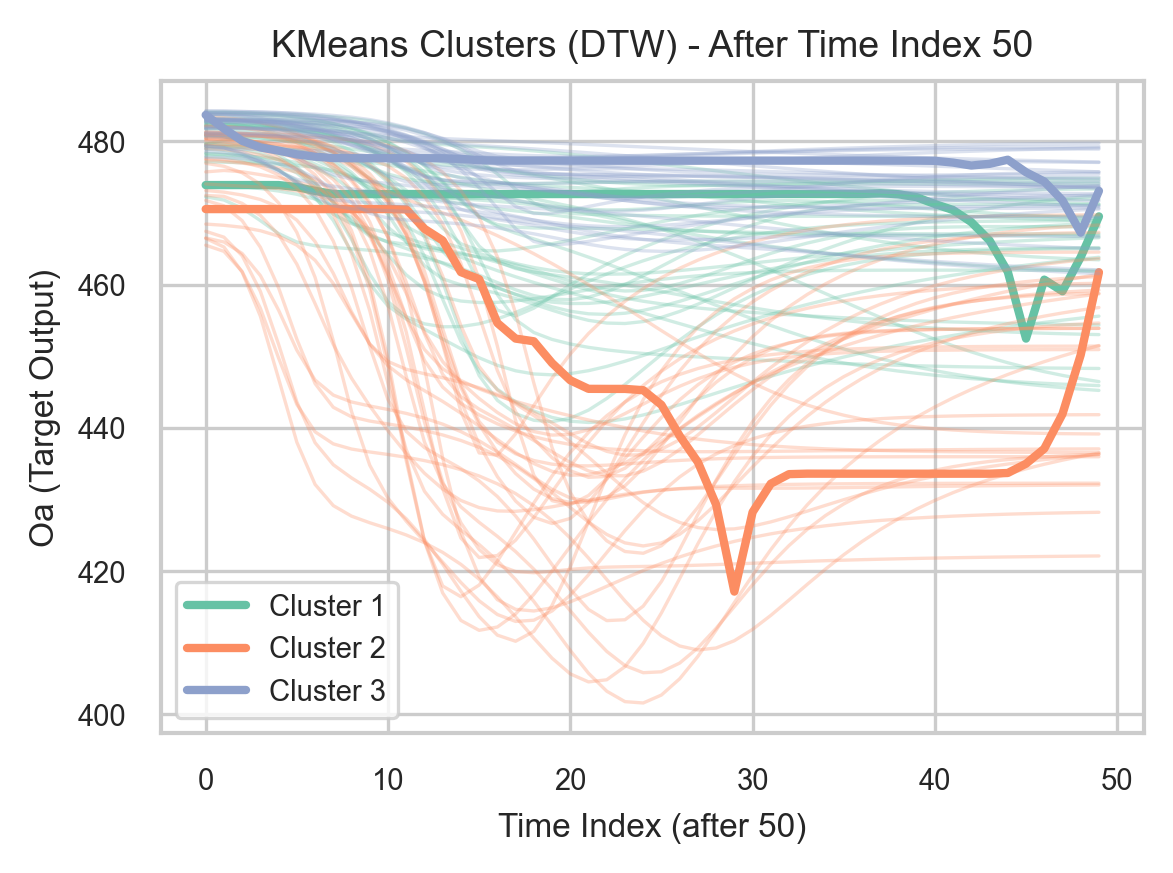

In [ ]:
# Repeat the cluster plot but only plot time index after 50
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)

for cluster in range(n_clusters):
    idx = cluster_labels == cluster
    for tc in np.array(timecourse_data)[idx][:30]:
        ax.plot(tc[50:], color=palette[cluster], alpha=0.3, linewidth=0.8)
    ax.plot(kmeans.cluster_centers_[cluster].ravel()[50:], color=palette[cluster], linewidth=2, label=f'Cluster {cluster+1}')

ax.set_xlabel('Time Index (after 50)', fontsize=8)
ax.set_ylabel('Oa (Target Output)', fontsize=8)
ax.set_title('KMeans Clusters (DTW) - After Time Index 50', fontsize=9)
ax.legend(fontsize=7, loc='best', frameon=True)
ax.tick_params(axis='both', labelsize=7)
plt.tight_layout()

save_figure(notebook_config, fig, "kmeans_clusters_after50", "png", verbose=1, dpi=300)
plt.show()

C:\Users\l8105\AppData\Local\Temp\ipykernel_23272\117976183.py:19: RuntimeWarning: invalid value encountered in divide
  cv_per_time = std_trajectory / np.abs(mean_trajectory)


Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\figures\testCaseE3R_variance_analysis.png


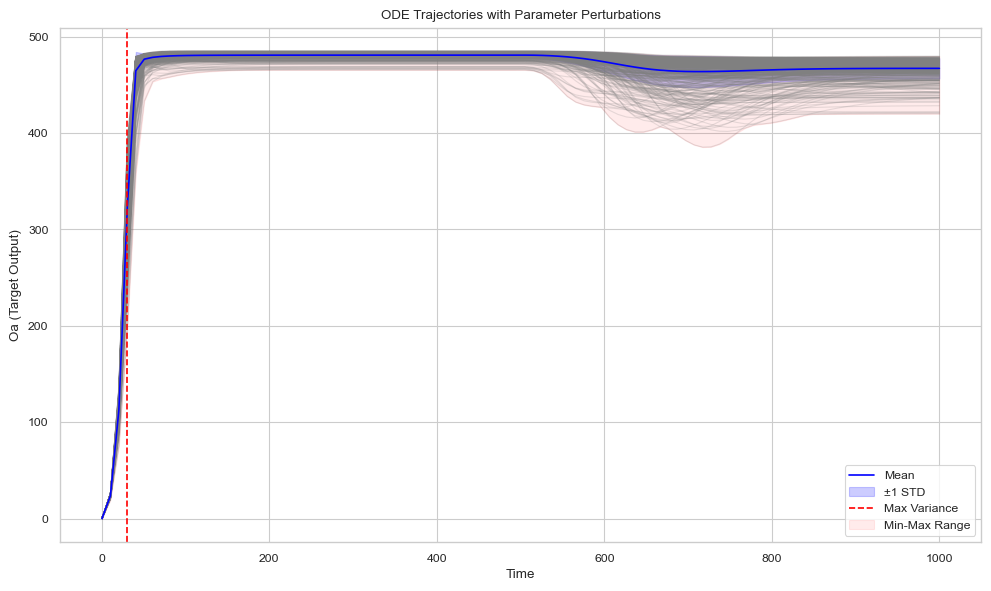

Maximum variance occurs at t = 30.30
Mean variance across all time points: 95.766


In [ ]:
import numpy as np

# Time-series variance analysis for ODE outputs in current workflow

import matplotlib.pyplot as plt

# Use the existing feature_data (parameter samples) and timecourse_data (ODE outputs)
# feature_data: DataFrame of shape (n_samples, n_params)
# timecourse_data: list of np.ndarray, each shape (n_timepoints,)

# Convert timecourse_data to array: shape (n_samples, n_timepoints)
trajectories_array = np.stack(timecourse_data)  # shape: (n_samples, n_timepoints)
n_simulations, n_timepoints = trajectories_array.shape

# Calculate statistics across simulations at each time point
mean_trajectory = np.mean(trajectories_array, axis=0)
std_trajectory = np.std(trajectories_array, axis=0)
variance_per_time = np.var(trajectories_array, axis=0)
cv_per_time = std_trajectory / np.abs(mean_trajectory)
max_per_time = np.max(trajectories_array, axis=0)
min_per_time = np.min(trajectories_array, axis=0)

# Identify time of maximum variance
max_var_time_idx = np.argmax(variance_per_time)
max_var_time = max_var_time_idx  # time index (since time vector is index)
if hasattr(res, "time"):
    t_eval = res["time"].values
    max_var_time = t_eval[max_var_time_idx]
else:
    t_eval = np.arange(n_timepoints)

# Plot all trajectories, mean ± std, and highlight max variance
plt.figure(figsize=(10, 6))

# (A) Plot all trajectories
for i in range(n_simulations):
    plt.plot(t_eval, trajectories_array[i], color="gray", alpha=0.2, linewidth=0.8)

# (B) Plot mean ± std
plt.plot(t_eval, mean_trajectory, color="blue", label="Mean")
plt.fill_between(
    t_eval,
    mean_trajectory - std_trajectory,
    mean_trajectory + std_trajectory,
    color="blue",
    alpha=0.2,
    label="±1 STD",
)

# (C) Highlight time points with highest variance
plt.axvline(x=max_var_time, color="red", linestyle="--", label="Max Variance")

# (D) Optional: fill between min and max
plt.fill_between(
    t_eval, min_per_time, max_per_time, color="red", alpha=0.08, label="Min-Max Range"
)

plt.xlabel("Time Index" if not hasattr(res, "time") else "Time")
plt.ylabel("Oa (Target Output)")
plt.title("ODE Trajectories with Parameter Perturbations")
plt.legend()
plt.tight_layout()

save_figure(notebook_config, plt.gcf(), "variance_analysis", "png", verbose=1, dpi=300)
plt.show()

# Print interpretation
print(f"Maximum variance occurs at t = {max_var_time:.2f}")
print(f"Mean variance across all time points: {np.mean(variance_per_time):.3f}")


Figure saved at I:\My Drive\DAWSON PHD PROJECT\Biomarker Data Repository\data\data-and-mechanism-project\model-inspection\figures\testCaseE3R_variance_analysis_after50.png


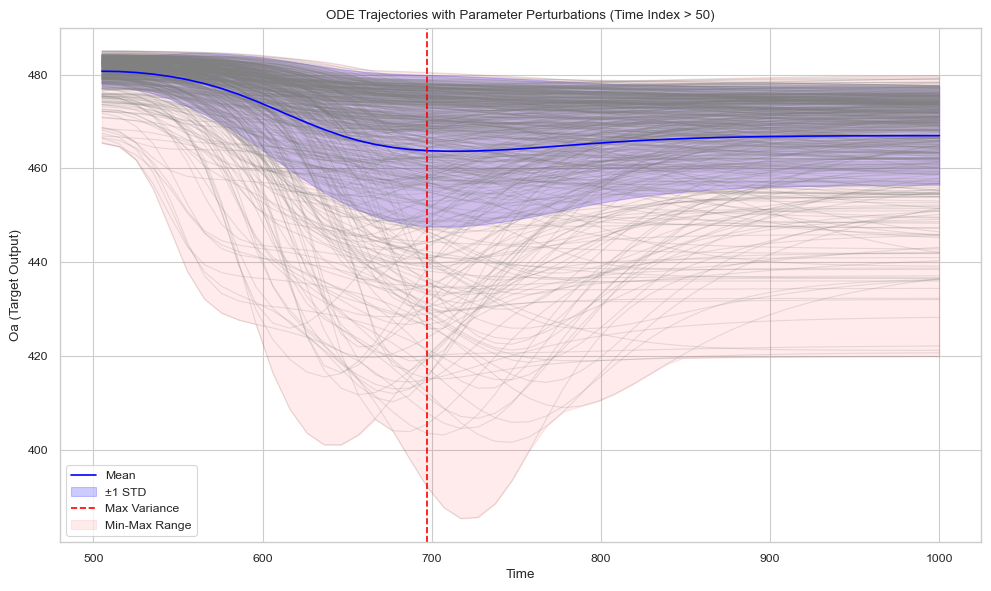

Maximum variance (after index 50) occurs at t = 696.97
Mean variance (after index 50): 139.400


In [ ]:
# Restrict analysis to time index > 50
start_idx = 50

# Slice arrays for time > 50
t_eval_sub = t_eval[start_idx:]
trajectories_sub = trajectories_array[:, start_idx:]

# Calculate statistics across simulations at each time point (after index 50)
mean_trajectory_sub = np.mean(trajectories_sub, axis=0)
std_trajectory_sub = np.std(trajectories_sub, axis=0)
variance_per_time_sub = np.var(trajectories_sub, axis=0)
cv_per_time_sub = std_trajectory_sub / np.abs(mean_trajectory_sub)
max_per_time_sub = np.max(trajectories_sub, axis=0)
min_per_time_sub = np.min(trajectories_sub, axis=0)

# Identify time of maximum variance (after index 50)
max_var_time_idx_sub = np.argmax(variance_per_time_sub)
max_var_time_sub = t_eval_sub[max_var_time_idx_sub]

# Plot all trajectories, mean ± std, and highlight max variance (after index 50)
plt.figure(figsize=(10, 6))

# (A) Plot all trajectories
for i in range(n_simulations):
    plt.plot(t_eval_sub, trajectories_sub[i], color="gray", alpha=0.2, linewidth=0.8)

# (B) Plot mean ± std
plt.plot(t_eval_sub, mean_trajectory_sub, color="blue", label="Mean")
plt.fill_between(
    t_eval_sub,
    mean_trajectory_sub - std_trajectory_sub,
    mean_trajectory_sub + std_trajectory_sub,
    color="blue",
    alpha=0.2,
    label="±1 STD",
)

# (C) Highlight time point with highest variance
plt.axvline(x=max_var_time_sub, color="red", linestyle="--", label="Max Variance")

# (D) Optional: fill between min and max
plt.fill_between(
    t_eval_sub, min_per_time_sub, max_per_time_sub, color="red", alpha=0.08, label="Min-Max Range"
)

plt.xlabel("Time" if hasattr(res, "time") else "Time Index")
plt.ylabel("Oa (Target Output)")
plt.title("ODE Trajectories with Parameter Perturbations (Time Index > 50)")
plt.legend()
plt.tight_layout()

save_figure(notebook_config, plt.gcf(), "variance_analysis_after50", "png", verbose=1, dpi=300)
plt.show()

print(f"Maximum variance (after index 50) occurs at t = {max_var_time_sub:.2f}")
print(f"Mean variance (after index 50): {np.mean(variance_per_time_sub):.3f}")